<a href="https://colab.research.google.com/github/xxxnmxhj00/Pythorch/blob/main/%5Btorch%5D_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%84%A4%EC%9D%B4%EB%B2%84%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EA%B0%90%EC%83%81%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한국어

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 torchtext==0.6.0 -f https://download.pytorch.org/whl/torch_stable.html

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [53.3 kB]


In [ ]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [ ]:
import pandas as pd
import urllib.request # urllib 모듈은 웹에서 데이터를 가져오는 데 사용됩니다. request는 그 중에서 HTTP 요청을 처리하는 서브모듈
import matplotlib.pyplot as plt
import re
from konlpy.tag import Twitter #  ckonlpy 라이브러리에서 Twitter라는 형태소 분석기를 불러옵니다
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np

okt = Twitter()

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",
                           filename="ratings_train.txt")

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",
                           filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x7a8ff0c56e60>)

In [ ]:
train_data = pd.read_table('ratings_train.txt', encoding = 'utf-8')
test_data = pd.read_table('ratings_test.txt', encoding = 'utf-8')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
train_data.head(6)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
test_data.drop_duplicates(subset=['document'], inplace=True)

<Axes: xlabel='label'>

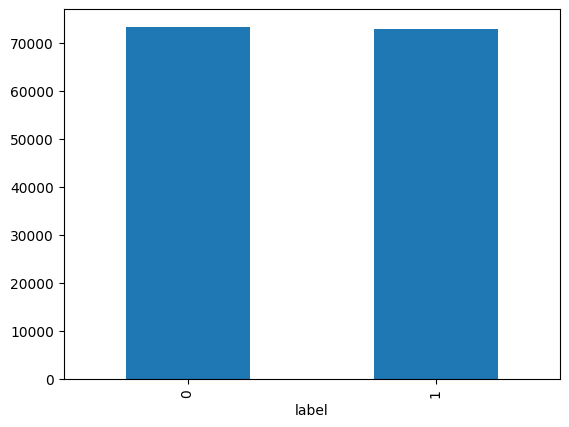

In [ ]:
train_data['label']. value_counts().plot(kind = 'bar')

<Axes: xlabel='label'>

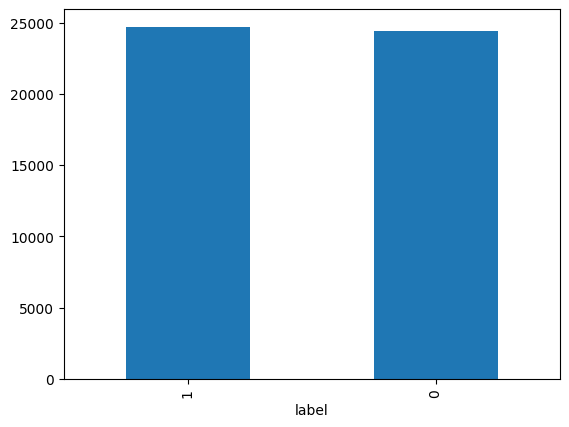

In [ ]:
test_data['label']. value_counts().plot(kind = 'bar')

In [ ]:
train_data = train_data.dropna(how = 'any') # 널값이 존재하는 행 제거
print('학습용:' , train_data.isnull().values.any()) # Null값이 존재하는지 확인

학습용: False


In [ ]:
test_data = test_data.dropna(how = 'any') # 널값이 존재하는 행 제거
print('테스트용:' , test_data.isnull().values.any()) # Null값이 존재하는지 확인

테스트용: False


In [ ]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146182 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146182 non-null  int64 
 1   document  146182 non-null  object
 2   label     146182 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


한글, 공백만 남기기

In [ ]:
document_1st = []

for i in train_data.index:
  document_1st.append(re.sub(r"[^ ㄱ-ㅣ가-힣]+", "", train_data.loc[i]['document']))

train_data['document'] = document_1st

In [ ]:
document_1st = []

for i in test_data.index:
  document_1st.append(re.sub(r"[^ ㄱ-ㅣ가-힣]+", "", test_data.loc[i]['document']))

test_data['document'] = document_1st

In [ ]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [ ]:
k_stopward = pd.read_csv('/content/korean_stopword.csv')
k_stopward.head()

,불용어
0,이
1,있
2,하
3,것
4,들


In [ ]:
stopward = list(k_stopward['불용어'])+['을','은', '를', '이가','과','의','는','에'] # 불용어 형태로 바꾸고 뒤에 추가해서 스탑워드가 리스트로 잘 있는지 리스트로 슬라이싱
stopward = list(set(stopward)) # stopward 중복 제거
stopward[:10] # set은 순서가 없는 자료형이라 지맘대로 바뀜

['녕', '좀', '집', '때', '들', '내', '까지', '막', '후', '로']

In [ ]:
from tqdm.notebook import tqdm

# mopphs 토큰화 시키는거, 사전에 있는 단어로 그냥 쪼개주는거
# morphs 리스트 형태

X_train = []
for i in tqdm(train_data.index):
  morph = okt.morphs(train_data.loc[i]['document'], stem = True)  # 각 인덱스(i)에 해당하는 문서를 불러와서 형태소 분석을 수행
                                                                  # okt.morphs()는 문장을 형태소 단위로 나눕니다. 'stem=True'는 단어의 어간을 추출합니다.
  temp_X = []
  for txt in morph:
    if txt not in stopward: # 만약 단어가 불용어 리스트에 포함되지 않는다면 (즉, 중요한 단어라면)
      temp_X.append(txt) # temp_X 리스트에 단어 추가
  X_train.append(temp_X)
X_train[:5]

  0%|          | 0/146182 [00:00<?, ?it/s]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다']]